In [72]:
# The code was removed by Watson Studio for sharing.

***
# <font color=grey>  GKV Churn Analysis </font>
***

## <font color=grey> Import Libraries </font>

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from numpy import std
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns

## <font color=grey> Load Data </font>

In [6]:
# The code was removed by Watson Studio for sharing.

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,1,34,M,0,0,1,single,8.0,Sueddeutschland,Thueringen,...,16.260385,26,ja,nein,nein,nein,ja,nein,nein,Kunde
1,2,52,M,0,0,0,NaN,8.0,Norddeutschland,Brandenburg,...,189.000000,1,nein,nein,nein,nein,ja,nein,nein,Kunde
2,3,76,F,1,0,0,single,3.0,Norddeutschland,Mecklenburg-Vorpommern,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,Abwanderer
3,4,81,M,1,0,0,single,NaN,Norddeutschland,Hamburg,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,Kunde
4,5,55,M,2,0,0,NaN,3.0,Sueddeutschland,Thueringen,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,Abwanderer


## <font color=grey> Exploratory Data Analysis </font>

In [7]:
df.shape

(737, 22)

In [9]:
df['Churn'].value_counts().to_frame()

,Churn
Kunde,431
Abwanderer,306


In [10]:
df = df.replace({'Abwanderer': 1})
df = df.replace({'Kunde': 0})
df.head(3)

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,1,34,M,0,0,1,single,8.0,Sueddeutschland,Thueringen,...,16.260385,26,ja,nein,nein,nein,ja,nein,nein,0
1,2,52,M,0,0,0,NaN,8.0,Norddeutschland,Brandenburg,...,189.000000,1,nein,nein,nein,nein,ja,nein,nein,0
2,3,76,F,1,0,0,single,3.0,Norddeutschland,Mecklenburg-Vorpommern,...,149.000000,2,nein,ja,nein,nein,ja,nein,nein,1


In [11]:
df.describe()

,ID,Alter,Kinder,DMP,Zahnzusatz,DAUER_Kundenbeziehung,Total_Beitraege,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,Churn
count,737.000000,737.000000,737.000000,737.000000,737.000000,735.000000,737.000000,737.000000,737.000000,737.000000
mean,369.000000,57.533243,0.985075,0.609227,0.335142,8.572789,254.309688,99.087113,5.776119,0.415197
std,212.897863,22.308224,0.811631,0.488255,0.472361,2.381198,228.423905,114.172091,9.111929,0.493091
min,1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,185.000000,39.000000,0.000000,0.000000,0.000000,8.000000,78.930000,20.447500,1.000000,0.000000
50%,369.000000,56.000000,1.000000,1.000000,0.000000,9.000000,189.000000,54.000000,1.000000,0.000000
75%,553.000000,77.000000,2.000000,1.000000,1.000000,11.000000,386.340000,149.000000,3.000000,1.000000
max,737.000000,97.000000,2.000000,1.000000,1.000000,11.000000,1101.080000,699.000000,45.000000,1.000000


## <font color=grey> Visualization</font>

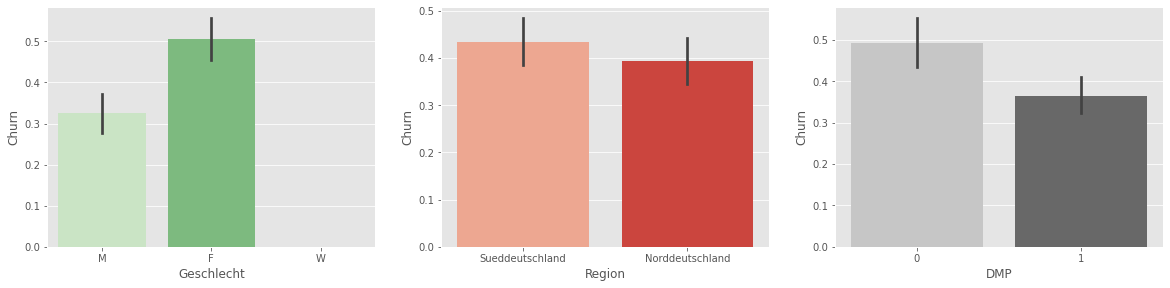

In [13]:
plt.figure(figsize=[20,15])

plt.subplot(331)
sns.barplot('Geschlecht', 'Churn', data = df, palette = "Greens")

plt.subplot(332)
sns.barplot('Region', 'Churn', data = df, palette = "Reds")

plt.subplot(333)
sns.barplot('DMP', 'Churn', data = df, palette = "Greys")

### <font color=black> Boxplot </font>

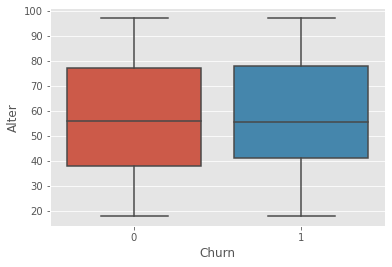

In [14]:
sns.boxplot(x="Churn", y="Alter", data=df)

### <font color=black> Korrelation </font>

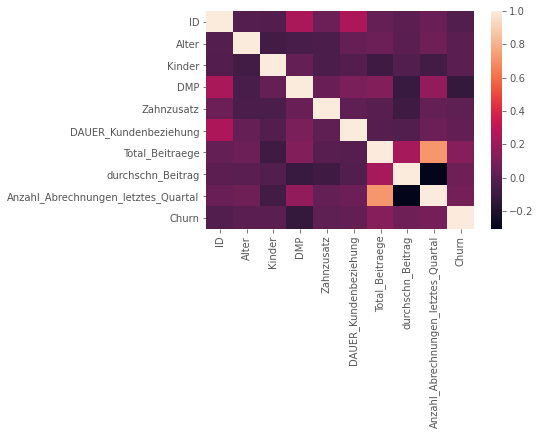

In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## <font color=grey> Missing Values </font>

In [20]:
df.isnull().sum()

ID                                     0
Alter                                  0
Geschlecht                             0
Kinder                                 0
DMP                                    0
Zahnzusatz                             0
Familienstand                          0
DAUER_Kundenbeziehung                  2
Region                                 0
Bundesland                             0
Gebiet                                 0
Total_Beitraege                        0
durchschn_Beitrag                      0
Anzahl_Abrechnungen_letztes_Quartal    0
c_Allgemeinmediziner                   0
c_Orthopaede                           0
c_Zahn                                 0
c_Radiologe                            0
c_HNO                                  0
c_Chirugie                             0
c_stationaer                           0
Churn                                  0
dtype: int64

### <font color=black> Impute Missings </font>

In [21]:
#Familienstand
#Replace the missing by the most frequent 
df['Familienstand'].replace(np.nan, "999", inplace=True)

# simply drop whole row with NaN in "price" column
df.dropna(subset=["DAUER_Kundenbeziehung"], axis=0, inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [22]:
#Test: Are still missing values in the DF
df.isnull().values.any()

False

### <font color=Black> Encoding Categorial Data</font>

In [23]:
#implement a viable data encoding
def numencode(Inputdaten):
    CatDaten = Inputdaten.select_dtypes(include=['object'])
    columns=[]
    columns = CatDaten.columns.values
    for col in columns:
        col = str(col)
        Inputdaten[col]=pd.Categorical(Inputdaten[col])
        Inputdaten[col]=Inputdaten[col].cat.codes

In [24]:
df_encoded = df
numencode(df_encoded)
df_encoded.head()

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,1,34,1,0,0,1,1,8.0,1,15,...,16.260385,26,0,1,1,1,0,1,1,0
1,2,52,1,0,0,0,0,8.0,0,3,...,189.000000,1,1,1,1,1,0,1,1,0
2,3,76,0,1,0,0,1,3.0,0,7,...,149.000000,2,1,0,1,1,0,1,1,1
3,5,55,1,2,0,0,0,3.0,1,15,...,149.000000,2,1,0,1,1,0,1,1,1
4,6,94,0,0,0,1,0,11.0,0,4,...,34.240000,2,0,1,1,1,1,1,1,1


### <font color=Black> Scaling</font>

In [25]:
df_encoded = df_encoded.drop('ID', 1)
df_encoded.head()

,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,Gebiet,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,34,1,0,0,1,1,8.0,1,15,0,...,16.260385,26,0,1,1,1,0,1,1,0
1,52,1,0,0,0,0,8.0,0,3,1,...,189.000000,1,1,1,1,1,0,1,1,0
2,76,0,1,0,0,1,3.0,0,7,1,...,149.000000,2,1,0,1,1,0,1,1,1
3,55,1,2,0,0,0,3.0,1,15,0,...,149.000000,2,1,0,1,1,0,1,1,1
4,94,0,0,0,1,0,11.0,0,4,0,...,34.240000,2,0,1,1,1,1,1,1,1


In [26]:
#standardize the data using a scaler object
names = df_encoded.columns
scaler = preprocessing.StandardScaler()
# Fit data to the scaler object
df_encoded_stand = scaler.fit_transform(df_encoded)
df_encoded_stand = pd.DataFrame(df_encoded_stand, columns=names)
df_encoded_stand.head()

,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,Gebiet,...,durchschn_Beitrag,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Churn
0,-1.053405,0.99055,-1.212439,-1.252969,1.405599,0.103136,-0.240710,0.956066,1.572464,-1.539987,...,-0.724240,2.217385,-1.157914,0.412774,0.354365,0.3371,-0.828118,0.480787,0.275925,-0.842201
1,-0.244739,0.99055,-1.212439,-1.252969,-0.711440,-1.139571,-0.240710,-1.045953,-0.961174,0.649356,...,0.787936,-0.525241,0.863622,0.412774,0.354365,0.3371,-0.828118,0.480787,0.275925,-0.842201
2,0.833482,-0.99867,0.020123,-1.252969,-0.711440,0.103136,-2.341924,-1.045953,-0.116628,0.649356,...,0.437773,-0.415536,0.863622,-2.422635,0.354365,0.3371,-0.828118,0.480787,0.275925,1.187365
3,-0.109961,0.99055,1.252686,-1.252969,-0.711440,-1.139571,-2.341924,0.956066,1.572464,-1.539987,...,0.437773,-0.415536,0.863622,-2.422635,0.354365,0.3371,-0.828118,0.480787,0.275925,1.187365
4,1.642148,-0.99867,-1.212439,-1.252969,1.405599,-1.139571,1.020018,-1.045953,-0.750037,-1.539987,...,-0.566845,-0.415536,-1.157914,0.412774,0.354365,0.3371,1.207557,0.480787,0.275925,1.187365


## <font color=grey> Modeling </font>

In [27]:
#transform data into vectors
Y = np.array(df_encoded['Churn'])
df_encoded_stand = df_encoded_stand.drop('Churn', 1)
X = np.array(df_encoded_stand)
print (X)
print (Y)

feature_mapping = {}
counter = 0
for x in df_encoded_stand.columns:
    feature_mapping[counter]=x
    counter = counter + 1

[[-1.05340473  0.99055041 -1.21243891 ... -0.82811824  0.48078663
   0.27592517]
 [-0.24473904  0.99055041 -1.21243891 ... -0.82811824  0.48078663
   0.27592517]
 [ 0.83348189 -0.99866968  0.02012347 ... -0.82811824  0.48078663
   0.27592517]
 ...
 [ 1.28274061  0.99055041  1.25268584 ... -0.82811824  0.48078663
   0.27592517]
 [ 1.01318538 -0.99866968  1.25268584 ...  1.20755703  0.48078663
   0.27592517]
 [ 0.51900079 -0.99866968 -1.21243891 ...  1.20755703  0.48078663
   0.27592517]]
[0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0
 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

## <font color=Black> Logistic Regression</font>

In [29]:
LR = LogisticRegression(C=0.44117647058823528, solver='liblinear').fit(X_train,Y_train)
LR.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=0.4411764705882353, solver='liblinear')>

#### Model Evaluation

In [30]:
#Übersicht
model = LR
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.6439688715953308
Accuracy (test set): 0.6425339366515838
AUC: 0.6011192754613807
Precision: 0.5737704918032787
Recall: 0.3977272727272727
F1 Score: 0.4697986577181208


### <font color=Black> Find the most important features </font>

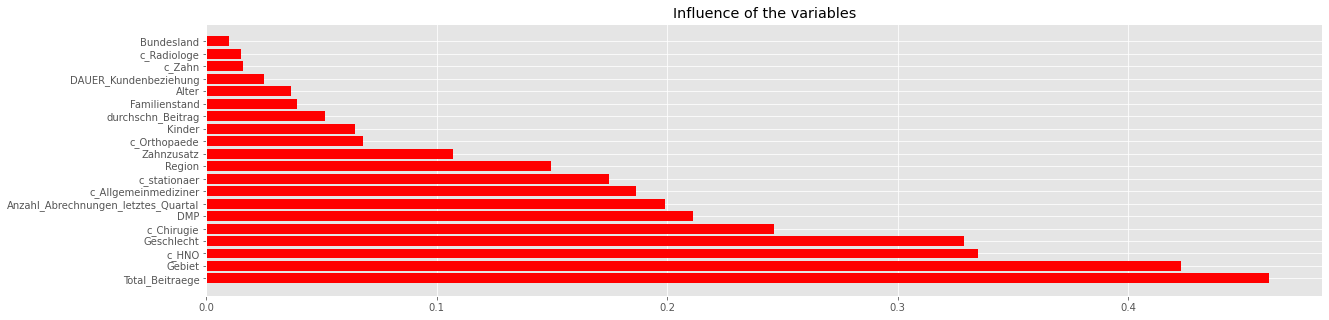

In [31]:
importances = LR.coef_
feature_list = []
label = []
value = []

for f in feature_mapping:
    feature_list.append((f, feature_mapping[f], abs(importances[0][f])))
feature_list.sort(key=lambda x: x[2], reverse=True)

for i in feature_list:
    label.append(i[1])
    value.append(i[2])

plt.figure(figsize=[20,5])
plt.title("Influence of the variables")
plt.barh(label, value, color="r", align="center")
plt.show()

## <font color=Black> Random Forest</font>

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [34]:
# Model Evaluation
model = rf
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.6789883268482491
Accuracy (test set): 0.669683257918552
AUC: 0.5909945317840055
Precision: 0.8571428571428571
Recall: 0.20454545454545456
F1 Score: 0.3302752293577982


## <font color=Black> Decision Tree</font>

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dTree = DecisionTreeClassifier(min_samples_leaf=50, criterion="entropy", max_depth = 5)
dTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

In [37]:
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

In [38]:
# Model Evaluation
model = dTree
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.6361867704280155
Accuracy (test set): 0.6153846153846154
AUC: 0.5670283663704717
Precision: 0.5272727272727272
Recall: 0.32954545454545453
F1 Score: 0.40559440559440557


## <font color=grey> Visualization Decision Tree</font>

In [39]:
!pip install graphviz

In [40]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 9.5 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=4c7bb015b1cbb326bc0016e1e2d466def0dacf34265066c691e340fc0fddb628
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [41]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

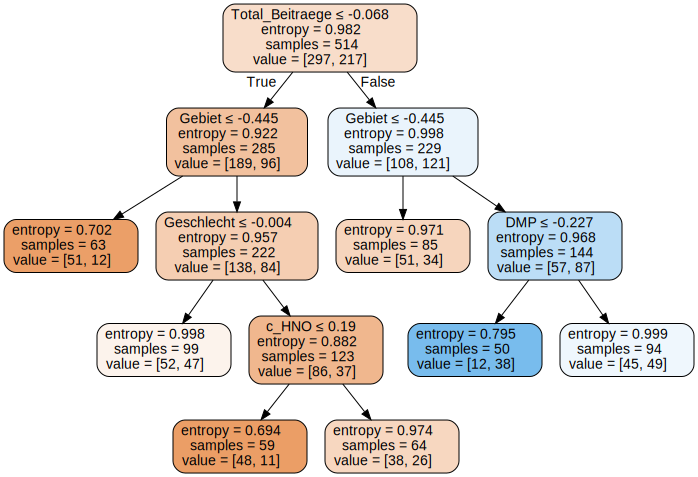

In [48]:
dot_data = tree.export_graphviz(dTree, out_file=None,
                                feature_names=df_encoded_stand.columns[0:20], 
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

## XGBoost

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb= XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=5, learning_rate=0.02, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=600, nthread=1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0)
xgb.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_depth=5,
              min_child_weight=5, n_estimators=600, nthread=1, seed=0,
              silent=True, subsample=1.0)

In [53]:
# Modelevaluation
model = xgb
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.7587548638132295
Accuracy (test set): 0.6606334841628959
AUC: 0.6007775119617226
Precision: 0.6585365853658537
Recall: 0.3068181818181818
F1 Score: 0.4186046511627907


## <font color=grey> Model Comparison </font>

In [54]:
# Model Evaluation AUC
print ('AUC')
print ('Logistic Regression:', roc_auc_score(Y_test, LR.predict(X_test)))
print ('Random Forrest:', roc_auc_score(Y_test, rf.predict(X_test)))
print ('Decision Tree:', roc_auc_score(Y_test, dTree.predict(X_test)))
print ('XGBoost:', roc_auc_score(Y_test, xgb.predict(X_test)))

AUC
Logistic Regression: 0.6011192754613807
Random Forrest: 0.5909945317840055
Decision Tree: 0.5670283663704717
XGBoost: 0.6007775119617226


## <font color=grey> Scoring New Data </font>

In [55]:
# The code was removed by Watson Studio for sharing.

,ID,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,...,Anzahl_Abrechnungen_letztes_Quartal,c_Allgemeinmediziner,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Beschwerden_letztes Jahr,Beschwerdekanal
0,1,95,M,2,1,0,NaN,3.0,Sueddeutschland,Saarland,...,16,ja,nein,nein,nein,ja,ja,nein,0,NaN
1,2,67,M,2,1,0,verheiratet,11.0,Norddeutschland,Nordrhein-Westfalen,...,16,ja,nein,nein,nein,ja,ja,nein,0,NaN
2,3,82,F,1,1,0,verheiratet,9.0,Norddeutschland,Nordrhein-Westfalen,...,16,ja,nein,nein,nein,ja,ja,nein,1,Call Center
3,4,58,F,1,1,0,NaN,8.0,Norddeutschland,Nordrhein-Westfalen,...,3,ja,nein,nein,nein,nein,ja,nein,0,NaN
4,5,49,M,1,1,0,single,11.0,Sueddeutschland,Bayern,...,0,nein,nein,nein,nein,nein,nein,nein,1,Brief


In [56]:
#Dataprep
df1 = df1.drop(['ID'], axis =1)

#implement a viable data encoding
def numencode(Inputdaten):
    CatDaten = Inputdaten.select_dtypes(include=['object'])
    columns=[]
    columns = CatDaten.columns.values
    for col in columns:
        col = str(col)
        Inputdaten[col]=pd.Categorical(Inputdaten[col])
        Inputdaten[col]=Inputdaten[col].cat.codes
df_enc = df1
numencode(df_enc)

#standardize the data using a scaler object
names = df_enc.columns
scaler = preprocessing.StandardScaler()
# Fit data to the scaler object
dfnew = scaler.fit_transform(df_enc)
dfnew = pd.DataFrame(dfnew, columns=names)

In [57]:
df_encoded_stand.columns

Index(['Alter', 'Geschlecht', 'Kinder', 'DMP', 'Zahnzusatz', 'Familienstand',
       'DAUER_Kundenbeziehung', 'Region', 'Bundesland', 'Gebiet',
       'Total_Beitraege', 'durchschn_Beitrag',
       'Anzahl_Abrechnungen_letztes_Quartal', 'c_Allgemeinmediziner',
       'c_Orthopaede', 'c_Zahn', 'c_Radiologe', 'c_HNO', 'c_Chirugie',
       'c_stationaer'],
      dtype='object')

In [58]:
X1 = np.array(dfnew[['Alter', 'Geschlecht', 'Kinder', 'DMP', 'Zahnzusatz', 'Familienstand',
       'DAUER_Kundenbeziehung', 'Region', 'Bundesland', 'Gebiet',
       'Total_Beitraege', 'durchschn_Beitrag',
       'Anzahl_Abrechnungen_letztes_Quartal', 'c_Allgemeinmediziner',
       'c_Orthopaede', 'c_Zahn', 'c_Radiologe', 'c_HNO', 'c_Chirugie',
       'c_stationaer']])

In [59]:
predict = xgb.predict(X1)

In [60]:
proba = xgb.predict_proba(X1)[:,1]

In [61]:
df1['Prediction'] = predict
df1['Probability'] = proba
df1.head()

,Alter,Geschlecht,Kinder,DMP,Zahnzusatz,Familienstand,DAUER_Kundenbeziehung,Region,Bundesland,Gebiet,...,c_Orthopaede,c_Zahn,c_Radiologe,c_HNO,c_Chirugie,c_stationaer,Beschwerden_letztes Jahr,Beschwerdekanal,Prediction,Probability
0,95,1,2,1,0,-1,3.0,1,11,0,...,1,1,1,0,0,1,0,-1,0,0.336030
1,67,1,2,1,0,1,11.0,0,9,1,...,1,1,1,0,0,1,0,-1,0,0.483919
2,82,0,1,1,0,1,9.0,0,9,1,...,1,1,1,0,0,1,1,1,1,0.622588
3,58,0,1,1,0,-1,8.0,0,9,1,...,1,1,1,1,0,1,0,-1,1,0.545231
4,49,1,1,1,0,0,11.0,1,1,1,...,1,1,1,1,1,1,1,0,0,0.335826


## <font color=grey> Deployment </font>

In [62]:
# The code was removed by Watson Studio for sharing.

In [63]:
from ibm_watson_machine_learning import APIClient
client = APIClient(wml_credentials)

In [64]:
#Set Project-ID
project_id='c7a69a86-bf31-41cc-8300-3b1fa410d393'
client.set.default_project(project_id)

'SUCCESS'

In [66]:
# Test: Can data assets in the project be accessed?
client.data_assets.list()

------------------------  ----------  -----  ------------------------------------
NAME                      ASSET_TYPE  SIZE   ASSET_ID
GKV_Stammdaten.csv        data_asset  82315  f7c00d82-d626-4901-a3fc-84949854eb62
GKV_Daten_Neu.csv         data_asset  10987  3e1698bf-cecc-41fb-8097-b7d481639d45
GKV_ CRM_Beschwerden.csv  data_asset  8230   2a2ecfa7-4828-4e87-ae25-67ee3327695c
------------------------  ----------  -----  ------------------------------------


In [67]:
#Show List
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [68]:
import sklearn as skl
skl.__version__

'0.23.1'

In [69]:
sofware_spec_uid = client.software_specifications.get_id_by_name("default_py3.7")

In [70]:
metadata = {
            client.repository.ModelMetaNames.NAME: 'Decison Tree',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=dTree,
    meta_props=metadata,
    training_data=df_encoded_stand,
    training_target=df['Churn'])

In [71]:
#get all models
models_details = client.repository.list_models()

------------------------------------  ------------  ------------------------  -----------------
ID                                    NAME          CREATED                   TYPE
d4c8fcfd-5e6e-436c-a073-1e87ac3d397e  Decison Tree  2020-10-22T19:29:44.002Z  scikit-learn_0.23
------------------------------------  ------------  ------------------------  -----------------


### Deploy directly in a Deployment Space

In [65]:
#deployments in WS Dallas
client.spaces.list(limit=10)

------------------------------------  -----------------------------------------------------------  ------------------------
ID                                    NAME                                                         CREATED
dc8b4ea3-39cc-4905-81fb-1f14c093cf4d  openscale-express-path-92e26602-6f52-46c3-ac46-e9ba6102f741  2020-10-22T12:01:28.168Z
5d8f2f3d-e7c0-4cbb-b6b5-6aa392521b92  Retail Analytics                                             2020-10-21T22:57:55.879Z
095f2e02-c379-45d3-a539-fc147889f2b8  Leasing                                                      2020-09-25T19:35:59.536Z
09a2d28f-28a7-4db1-8ad9-87db090d2aec  Predictive Quality                                           2020-09-11T22:53:57.973Z
d43483f2-4959-4a92-b046-aeac3a7a5fa0  Learning Tutorial                                            2020-09-10T20:47:09.036Z
dd60b719-e79b-4dd2-be23-3ee0f093076f  Predictive Forecasting                                       2020-09-02T17:14:11.659Z
-------------------------

In [64]:
space_id = '...'

In [ ]:
client.set.default_space(space_id)